In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import cv2

def load_data(data_dir):
    gestures = os.listdir(data_dir)
    images, labels = [], []
    for idx, gesture in enumerate(gestures):
        gesture_path = os.path.join(data_dir, gesture)
        for image_name in os.listdir(gesture_path):
            image_path = os.path.join(gesture_path, image_name)
            image = tf.keras.preprocessing.image.load_img(image_path, target_size=(64, 64))
            image = tf.keras.preprocessing.image.img_to_array(image)
            images.append(image)
            labels.append(idx)
    return np.array(images), np.array(labels), gestures

data_dir = "./dataset"  
X, y, gesture_labels = load_data(data_dir)

# Normalize pixel values
X = X / 255.0

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# One-hot encode labels
y_train = tf.keras.utils.to_categorical(y_train, num_classes=len(gesture_labels))
y_test = tf.keras.utils.to_categorical(y_test, num_classes=len(gesture_labels))

In [2]:
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
datagen.fit(X_train)

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(gesture_labels), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

c:\Users\Soumesh\anaconda3\envs\env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [7]:
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    epochs=25,
    validation_data=(X_test, y_test)
)

Epoch 1/25
132/132 ━━━━━━━━━━━━━━━━━━━━ 12s 88ms/step - accuracy: 0.9053 - loss: 0.3102 - val_accuracy: 0.9886 - val_loss: 0.0494
Epoch 2/25
132/132 ━━━━━━━━━━━━━━━━━━━━ 13s 93ms/step - accuracy: 0.8985 - loss: 0.3018 - val_accuracy: 0.9828 - val_loss: 0.0602
Epoch 3/25
132/132 ━━━━━━━━━━━━━━━━━━━━ 12s 85ms/step - accuracy: 0.8953 - loss: 0.3078 - val_accuracy: 0.9867 - val_loss: 0.0436
Epoch 4/25
132/132 ━━━━━━━━━━━━━━━━━━━━ 11s 81ms/step - accuracy: 0.9072 - loss: 0.2751 - val_accuracy: 0.9914 - val_loss: 0.0374
Epoch 5/25
132/132 ━━━━━━━━━━━━━━━━━━━━ 11s 84ms/step - accuracy: 0.9114 - loss: 0.2848 - val_accuracy: 0.9886 - val_loss: 0.0415
Epoch 6/25
132/132 ━━━━━━━━━━━━━━━━━━━━ 11s 79ms/step - accuracy: 0.9012 - loss: 0.3045 - val_accuracy: 0.9905 - val_loss: 0.0366
Epoch 7/25
132/132 ━━━━━━━━━━━━━━━━━━━━ 11s 83ms/step - accuracy: 0.8771 - loss: 0.3686 - val_accuracy: 0.9886 - val_loss: 0.0404
Epoch 8/25
132/132 ━━━━━━━━━━━━━━━━━━━━ 13s 93ms/step - accuracy: 0.9074 - loss: 0.2999 - 

Test Accuracy: 99.43%
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


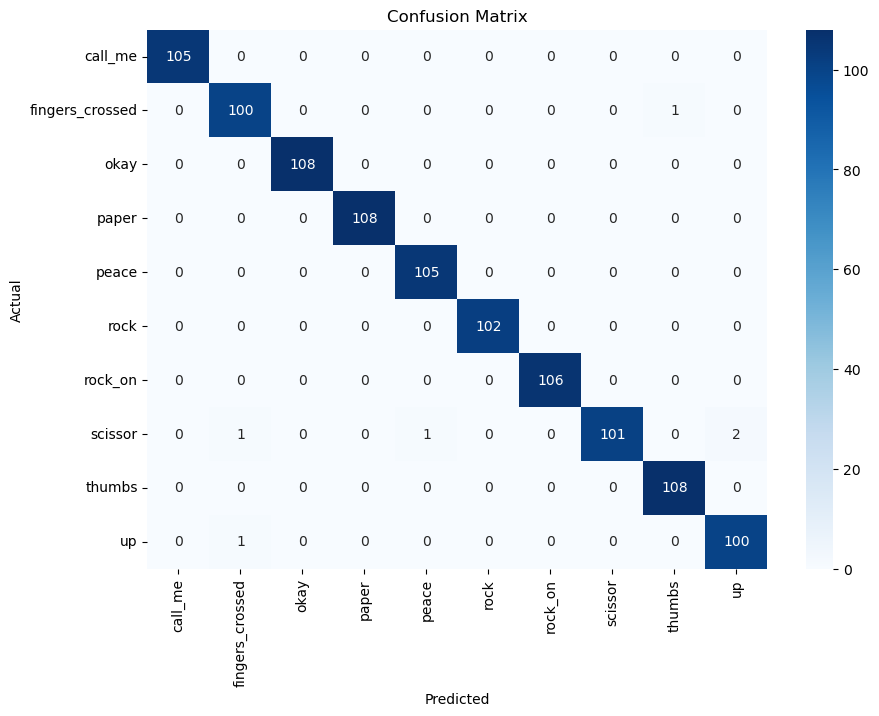

                 precision    recall  f1-score   support

        call_me       1.00      1.00      1.00       105
fingers_crossed       0.98      0.99      0.99       101
           okay       1.00      1.00      1.00       108
          paper       1.00      1.00      1.00       108
          peace       0.99      1.00      1.00       105
           rock       1.00      1.00      1.00       102
        rock_on       1.00      1.00      1.00       106
        scissor       1.00      0.96      0.98       105
         thumbs       0.99      1.00      1.00       108
             up       0.98      0.99      0.99       101

       accuracy                           0.99      1049
      macro avg       0.99      0.99      0.99      1049
   weighted avg       0.99      0.99      0.99      1049

Model saved as 'hand_gesture_model.h5'


In [8]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_true_classes, y_pred_classes)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=gesture_labels, yticklabels=gesture_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print(classification_report(y_true_classes, y_pred_classes, target_names=gesture_labels))

model.save("hand_gesture_model.h5")
print("Model saved as 'hand_gesture_model.h5'")

In [9]:
def preprocess_frame(frame):
    resized_frame = cv2.resize(frame, (64, 64))
    normalized_frame = resized_frame / 255.0
    input_frame = np.expand_dims(normalized_frame, axis=0)
    return input_frame

cap = cv2.VideoCapture(0)
print("Press 'q' to exit.")

while True:
    ret, frame = cap.read()
    if not ret:
        print("Failed to capture frame. Exiting...")
        break

    frame = cv2.flip(frame, 1)
    roi = frame[100:400, 100:400]
    cv2.rectangle(frame, (100, 100), (400, 400), (0, 255, 0), 2)
    input_frame = preprocess_frame(roi)

    predictions = model.predict(input_frame)
    predicted_label = np.argmax(predictions)
    gesture_name = gesture_labels[predicted_label]

    cv2.putText(frame, f"Gesture: {gesture_name}", (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
    cv2.imshow("Hand Gesture Recognition", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

Press 'q' to exit.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23m